In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.io as pio
from itertools import cycle

In [2]:
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'STIXGeneral'

In [3]:
def interInsUnitCells(E_2s, E_2p):
    hamilt_block = np.zeros((4, 4))

    for i in range(4):
        for j in range(4):
            if i == j:
                if i == 0:
                    hamilt_block[i][j] = E_2s
                else:
                    hamilt_block[i][j] = E_2p
            else:
                hamilt_block[i][j] = 0

    return hamilt_block

In [4]:
def interBetUnitCells(t_ss_sgm, t_sp_sgm, t_pp_sgm, t_pp_p, R, phi_1, phi_2, phi_3, z_1, z_2, z_3, r_1, r_2, r_3, k, m, coeff):
    hamilt_block = np.zeros((4, 4), dtype = complex)
    calc_exp_1, calc_exp_2, calc_exp_3 = np.exp(-1j * coeff * (k * z_1 + m * phi_1)), np.exp(-1j * coeff * (k * z_2 + m * phi_2)), np.exp(-1j * coeff * (k * z_3 + m * phi_3))

    for i in range(4):
        for j in range(4):
            if i == j:
                if i == 0:
                    hamilt_block[i][j] = -t_ss_sgm * (calc_exp_1 + calc_exp_2 + calc_exp_3)
                elif i == 1:
                    hamilt_block[i][j] = (((2 * R * (math.sin(coeff * phi_1 / 2) ** 2) / r_1) ** 2) * t_pp_sgm - (math.cos(coeff * phi_1) + (2 * R * (math.sin(coeff * phi_1 / 2) ** 2) / r_1) ** 2) * t_pp_p) * calc_exp_1 + (((2 * R * (math.sin(coeff * phi_2 / 2) ** 2) / r_2) ** 2) * t_pp_sgm - (math.cos(coeff * phi_2) + (2 * R * (math.sin(coeff * phi_2 / 2) ** 2) / r_2) ** 2) * t_pp_p) * calc_exp_2 + (((2 * R * (math.sin(coeff * phi_3 / 2) ** 2) / r_3) ** 2) * t_pp_sgm - (math.cos(coeff * phi_3) + (2 * R * (math.sin(coeff * phi_3 / 2) ** 2) / r_3) ** 2) * t_pp_p) * calc_exp_3
                elif i == 2:
                    hamilt_block[i][j] = -((((R * math.sin(coeff * phi_1) / r_1) ** 2) * t_pp_sgm + (math.cos(coeff * phi_1) - (R * math.sin(coeff * phi_1) / r_1) ** 2) * t_pp_p) * calc_exp_1 + (((R * math.sin(coeff * phi_2) / r_2) ** 2) * t_pp_sgm + (math.cos(coeff * phi_2) - (R * math.sin(coeff * phi_2) / r_2) ** 2) * t_pp_p) * calc_exp_2 + (((R * math.sin(coeff * phi_3) / r_3) ** 2) * t_pp_sgm + (math.cos(coeff * phi_3) - (R * math.sin(coeff * phi_3) / r_3) ** 2) * t_pp_p) * calc_exp_3)
                else:
                    hamilt_block[i][j] = -((((coeff * z_1 / r_1) ** 2) * t_pp_sgm + (1 - (coeff * z_1 / r_1) ** 2) * t_pp_p) * calc_exp_1 + (((coeff * z_2 / r_2) ** 2) * t_pp_sgm + (1 - (coeff * z_2 / r_2) ** 2) * t_pp_p) * calc_exp_2 + (((coeff * z_3 / r_3) ** 2) * t_pp_sgm + (1 - (coeff * z_3 / r_3) ** 2) * t_pp_p) * calc_exp_3)
            elif i == 0 or j == 0:
                if i == 1 or j == 1:
                    hamilt_block[i][j] = -2 * R * ((math.sin(coeff * phi_1 / 2) ** 2) / r_1 * calc_exp_1 + (math.sin(coeff * phi_2 / 2) ** 2) / r_2 * calc_exp_2 + (math.sin(coeff * phi_3 / 2) ** 2) / r_3 * calc_exp_3) * t_sp_sgm
                elif i == 2 or j == 2:
                    hamilt_block[i][j] = np.sign(i - j) * R * (math.sin(coeff * phi_1) / r_1 * calc_exp_1 + math.sin(coeff * phi_2) / r_2 * calc_exp_2 + math.sin(coeff * phi_3) / r_3 * calc_exp_3) * t_sp_sgm
                else:
                    hamilt_block[i][j] = np.sign(i - j) * coeff * (z_1 / r_1 * calc_exp_1 + z_2 / r_2 * calc_exp_2 + z_3 / r_3 * calc_exp_3) * t_sp_sgm
            else:
                if (i == 1 and j == 2) or (i == 2 and j == 1):
                    hamilt_block[i][j] = np.sign(j - i) * (math.sin(coeff * phi_1) * (2 * ((R * math.sin(coeff * phi_1 / 2) / r_1) ** 2) * t_pp_sgm + (1 - 2 * ((R * math.sin(coeff * phi_1 / 2) / r_1) ** 2)) * t_pp_p) * calc_exp_1 + math.sin(coeff * phi_2) * (2 * ((R * math.sin(coeff * phi_2 / 2) / r_2) ** 2) * t_pp_sgm + (1 - 2 * ((R * math.sin(coeff * phi_2 / 2) / r_2) ** 2)) * t_pp_p) * calc_exp_2 + math.sin(coeff * phi_3) * (2 * ((R * math.sin(coeff * phi_3 / 2) / r_3) ** 2) * t_pp_sgm + (1 - 2 * ((R * math.sin(coeff * phi_3 / 2) / r_3) ** 2)) * t_pp_p) * calc_exp_3)
                elif (i == 1 and j == 3) or (i == 3 and j == 1):
                    hamilt_block[i][j] = np.sign(j - i) * coeff * 2 * R * (z_1 * ((math.sin(coeff * phi_1 / 2) / r_1) ** 2) * calc_exp_1 + z_2 * ((math.sin(coeff * phi_2 / 2) / r_2) ** 2) * calc_exp_2 + z_3 * ((math.sin(coeff * phi_3 / 2) / r_3) ** 2) * calc_exp_3) * (t_pp_sgm - t_pp_p)
                else:
                    hamilt_block[i][j] = -R * coeff * (z_1 * math.sin(coeff * phi_1) / (r_1 ** 2) * calc_exp_1 + z_2 * math.sin(coeff * phi_2) / (r_2 ** 2) * calc_exp_2 + z_3 * math.sin(coeff * phi_3) / (r_3 ** 2) * calc_exp_3) * (t_pp_sgm - t_pp_p)

    return hamilt_block

In [5]:
def createHamilt(E_2s, E_2p, t_ss_sgm, t_sp_sgm, t_pp_sgm, t_pp_p, R, phi_1, phi_2, phi_3, z_1, z_2, z_3, r_1, r_2, r_3, k, m):
    hamilt = np.zeros([0, 8])

    for i in range(2):
        row = np.empty([4, 0])

        for j in range(2):
            if i == j:
                hamilt_block = interInsUnitCells(E_2s, E_2p)
            else:
                hamilt_block = interBetUnitCells(t_ss_sgm, t_sp_sgm, t_pp_sgm, t_pp_p, R, phi_1, phi_2, phi_3, z_1, z_2, z_3, r_1, r_2, r_3, k, m, np.sign(j - i))

            row = np.hstack([row, hamilt_block])

        hamilt = np.concatenate([hamilt, row])

    return hamilt

In [6]:
def hamiltEigVals(E_2s, E_2p, t_ss_sgm, t_sp_sgm, t_pp_sgm, t_pp_p, R, phi_1, phi_2, phi_3, z_1, z_2, z_3, r_1, r_2, r_3, k, m):
    hamilt = createHamilt(E_2s, E_2p, t_ss_sgm, t_sp_sgm, t_pp_sgm, t_pp_p, R, phi_1, phi_2, phi_3, z_1, z_2, z_3, r_1, r_2, r_3, k, m)
    eig_vals_res = np.linalg.eigvals(hamilt).real
    eig_vals_res.sort()
    
    return eig_vals_res

In [16]:
def calcBandGap(E: np.ndarray, band_min: int, band_max: int):

    return round(max(float(E[:, band_max].min() - E[:, band_min].max()), 0.00), 2)

In [64]:
def obtain_vbm_cbm(k, m, eig_vals_res, bands_num, val_band_num, cond_band_num):
    E = eig_vals_res.reshape(len(k), len(m), bands_num)
    max_val = E[:, :, val_band_num].max()
    index_val_max = np.argwhere(E[:, :, val_band_num] == max_val)
    min_cond = E[:, :, cond_band_num].min()
    index_cond_min = np.argwhere(E[:, :, cond_band_num] == min_cond)

    band_gap = round(max(float(min_cond - max_val), 0.00), 2)
    
    return index_val_max, index_cond_min, band_gap

In [7]:
def plot3DBandStr(
    x: np.ndarray,
    y: np.ndarray,
    E: np.ndarray,
    bands: list[int],
    elev: float = 45,
    azim: float = 20,
    alpha: float = 0.9,
    figsize: tuple[int, int] = (700, 600),
    title: str = None,
    ):

    color_cycle = cycle(pio.templates["plotly"].layout.colorway)

    X, Y = np.meshgrid(x, y, indexing = "ij")
    fig = go.Figure()

    for band in bands:
        Z = E[:, band].reshape((len(x), len(y)), order = "C")
        c = next(color_cycle)

        fig.add_trace(
            go.Surface(
                x = X, y = Y, z = Z,
                opacity = alpha,
                name = f"band {band}",
                surfacecolor = np.zeros_like(Z),
                colorscale = [[0, c], [1, c]],
                cmin = 0, cmax = 1,
                showscale = False
            )
        )

    fig.update_layout(
        title = title,
        width = figsize[0], height = figsize[1],
        scene = dict(
            xaxis_title = "k",
            yaxis_title = "m",
            zaxis_title = "E, eV",
            camera = dict(
                eye = dict(
                    x = 2 * np.cos(np.radians(azim)) * np.cos(np.radians(elev)),
                    y = 2 * np.sin(np.radians(azim)) * np.cos(np.radians(elev)),
                    z = 2 * np.sin(np.radians(elev))
                    )
                )
        ),
        margin = dict(l = 0, r = 0, b = 0, t = 40)
    )

    fig.show()

In [8]:
N = 4
M = 2
d = 1.42

In [9]:
t_ss_sgm = -4.30
t_sp_sgm = 4.98
t_pp_sgm = 6.38
t_pp_p = -2.66
E_2s = -7.30
E_2p = 0.00

In [10]:
D = N ** 2 + M ** 2 + N * M
R = d * math.sqrt(3 * D) / (2 * math.pi)

In [11]:
phi_1 = math.pi * (N + M) / D
phi_2 = -math.pi * N / D
phi_3 = -math.pi * M / D

In [12]:
z_1 = -d * (N - M) / (2 * math.sqrt(D))
z_2 = -d * (N + 2 * M) / (2 * math.sqrt(D))
z_3 = d * (2 * N + M) / (2 * math.sqrt(D))

In [13]:
r_1 = math.sqrt(4 * (R ** 2) * ((math.sin(phi_1 / 2)) ** 2) + z_1 ** 2)
r_2 = math.sqrt(4 * (R ** 2) * ((math.sin(phi_2 / 2)) ** 2) + z_2 ** 2)
r_3 = math.sqrt(4 * (R ** 2) * ((math.sin(phi_3 / 2)) ** 2) + z_3 ** 2)

In [14]:
k = np.concatenate((np.linspace(-math.pi / (abs(z_2) + abs(z_3)), 0, 301), np.linspace(0, math.pi / (abs(z_2) + abs(z_3)), 301)[1:]), axis = 0)
m = np.arange(math.floor(-math.pi / (abs(phi_1) + min(abs(phi_2), abs(phi_3)))), math.ceil(math.pi / (abs(phi_1) + min(abs(phi_2), abs(phi_3)))) + 1)

In [82]:
eig_vals_res = np.array([hamiltEigVals(E_2s, E_2p, t_ss_sgm, t_sp_sgm, t_pp_sgm, t_pp_p, R, phi_1, phi_2, phi_3, z_1, z_2, z_3, r_1, r_2, r_3, i, j) for i in k for j in m])
print(f"Band Gap = {calcBandGap(eig_vals_res, 3, 4)} eV")
plot3DBandStr(k, m, eig_vals_res, bands = [3, 4], alpha = 0.8)

Band Gap = 1.91 eV


In [89]:
def obtain_vbm_cbm(k, m, eig_vals_res, bands_num, val_band_num, cond_band_num):
    E = eig_vals_res.reshape(len(k), len(m), bands_num)
    max_val = E[:, :, val_band_num].max()
    index_val_max = np.argwhere(E[:, :, val_band_num] == max_val)
    min_cond = E[:, :, cond_band_num].min()
    index_cond_min = np.argwhere(E[:, :, cond_band_num] == min_cond)

    band_gap = round(max(float(min_cond - max_val), 0.00), 2)
    
    return E, index_val_max, index_cond_min, band_gap

In [113]:
def plot_2D_band_structure(k, E, bands_num, val_band, cond_band, vbm, cbm, m_cbm_i, m_vbm_i):
    print("E type:", type(E))
    print("E shape:", np.asarray(E).shape)
    print("E ndim:", np.asarray(E).ndim)
    plt.figure()

    for band in range(0, val_band+1):
        Ek_v = E[:, m_vbm_i, band]
        plt.plot(k, Ek_v, color='orange')
        if band == val_band:
            plt.plot(k, Ek_v, label=f"VB (band {band}) at m={m_vbm_i}", color='orange', linewidth=2)

    for band in range(cond_band, bands_num):
        Ek_c = E[:, m_cbm_i, band]
        plt.plot(k, Ek_c, color='blue')
        if band == cond_band:
            plt.plot(k, Ek_c, label=f"CB (band {band}) at m={m_cbm_i}", color='blue', linewidth=2)
    
    plt.scatter(vbm, E.iloc[m_vbm_i, val_band], label="VBM", zorder=3)
    plt.scatter(cbm, E.iloc[m_cbm_i, cond_band], label="CBM", zorder=3)
    plt.xlabel("k")
    plt.ylabel("Energy (eV)")
    plt.title("Selected bands for VBM/CBM m-values")
    plt.grid(True)
    plt.legend()
    plt.show()

In [90]:
E, index_val_max, index_cond_min, band_gap = obtain_vbm_cbm(k, m, eig_vals_res, 8, 3, 4)

In [94]:
E[:, 6, 1]

array([-14.66537369, -14.68163805, -14.6975139 , -14.71297736,
       -14.72800262, -14.74256178, -14.75662481, -14.77015938,
       -14.78313089, -14.79550237, -14.80723459, -14.8182861 ,
       -14.82861343, -14.83817134, -14.84691326, -14.85479176,
       -14.8617592 , -14.86776856, -14.8727743 , -14.87673343,
       -14.8796066 , -14.8813592 , -14.8819625 , -14.88139457,
       -14.87964113, -14.87669614, -14.87256203, -14.86724973,
       -14.86077832, -14.85317444, -14.84447143, -14.83470832,
       -14.82392873, -14.81217974, -14.79951077, -14.78597254,
       -14.77161619, -14.75649246, -14.74065109, -14.72414027,
       -14.70700631, -14.68929336, -14.67104324, -14.65229538,
       -14.63308677, -14.61345204, -14.59342349, -14.57303118,
       -14.55230309, -14.53126522, -14.50994168, -14.48835489,
       -14.46652568, -14.44447339, -14.42221603, -14.39977037,
       -14.37715204, -14.35437567, -14.33145492, -14.30840261,
       -14.28523079, -14.2619508 , -14.23857336, -14.21

In [93]:
index_cond_min[0, 1]

6

In [98]:
print(type(index_cond_min[0, 1]), index_cond_min[0, 1])
print(type(index_val_max[0, 1]), index_val_max[0, 1])


<class 'numpy.int64'> 6
<class 'numpy.int64'> 1


E type: <class 'numpy.ndarray'>
E shape: (601, 9, 8)
E ndim: 3


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

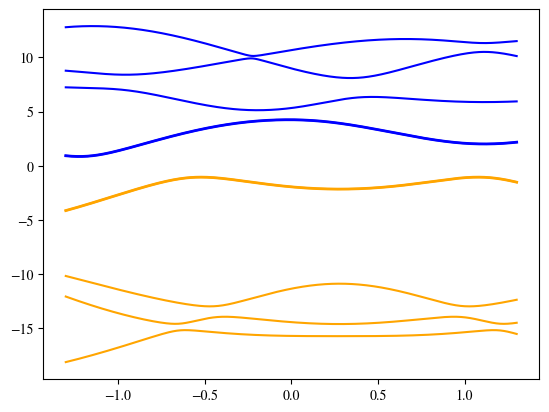

In [114]:
plot_2D_band_structure(k, E, 8, 3, 4, E[index_val_max[0]], E[index_cond_min[0]], index_cond_min[0, 1], index_val_max[0, 1])